In [3]:
import pandas as pd
import matplotlib.pyplot as pd
import numpy as np
import seaborn as sns
import cv2
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')

In [5]:
import os
import glob

In [7]:
parent_folder = r"C:\Users\This PC\Desktop\Waste Classification ML\Waste_Classification" 

In [9]:
train_folder = os.path.join(parent_folder, "TRAIN")
test_folder = os.path.join(parent_folder, "TEST")

train_categories = [f for f in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, f))]
test_categories = [f for f in os.listdir(test_folder) if os.path.isdir(os.path.join(test_folder, f))]

print("Train categories:", train_categories)
print("Test categories:", test_categories)


Train categories: ['O', 'R']
Test categories: ['O', 'R']


In [11]:
train_images = glob.glob(os.path.join(train_folder, "*", "*.*"))
test_images = glob.glob(os.path.join(test_folder, "*", "*.*"))

print("Number of training images:", len(train_images))
print("Number of test images:", len(test_images))


Number of training images: 22564
Number of test images: 2513


In [13]:
train_images

['C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_1.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_10.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_100.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_1000.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_10000.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_10001.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_10002.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_10003.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_10004.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_10

In [15]:
train_path = "C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN"
test_path = "C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST"

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [21]:
import pandas as pd   

data = pd.DataFrame({'image': x_data, 'label': y_data})   


In [23]:
from cv2 import cvtColor
x_data =[]
y_data =[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [00:25<00:00, 391.74it/s]


In [25]:
data.shape

(22564, 2)

In [27]:
from collections import Counter
Counter(y_data)

Counter({'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O': 12565,
         'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\R': 9999})

In [33]:
import matplotlib.pyplot as plt

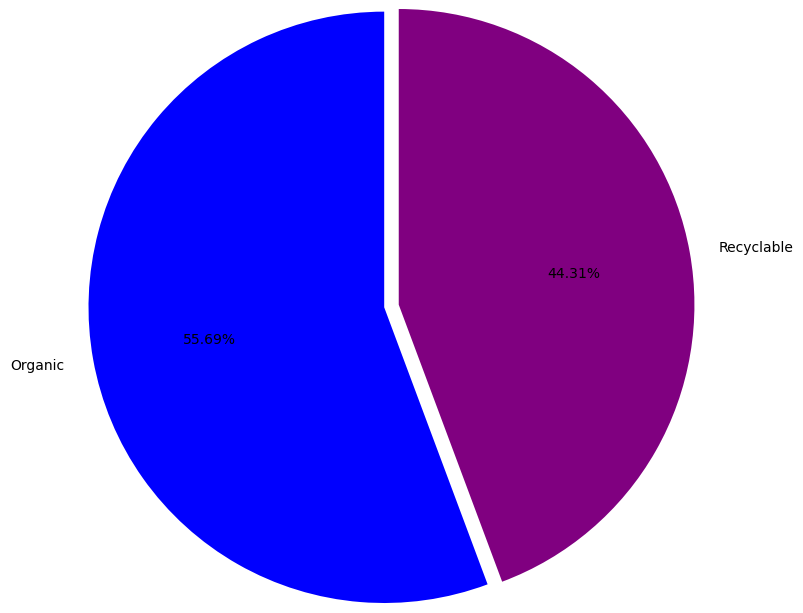

In [35]:
colors = ['blue','purple']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

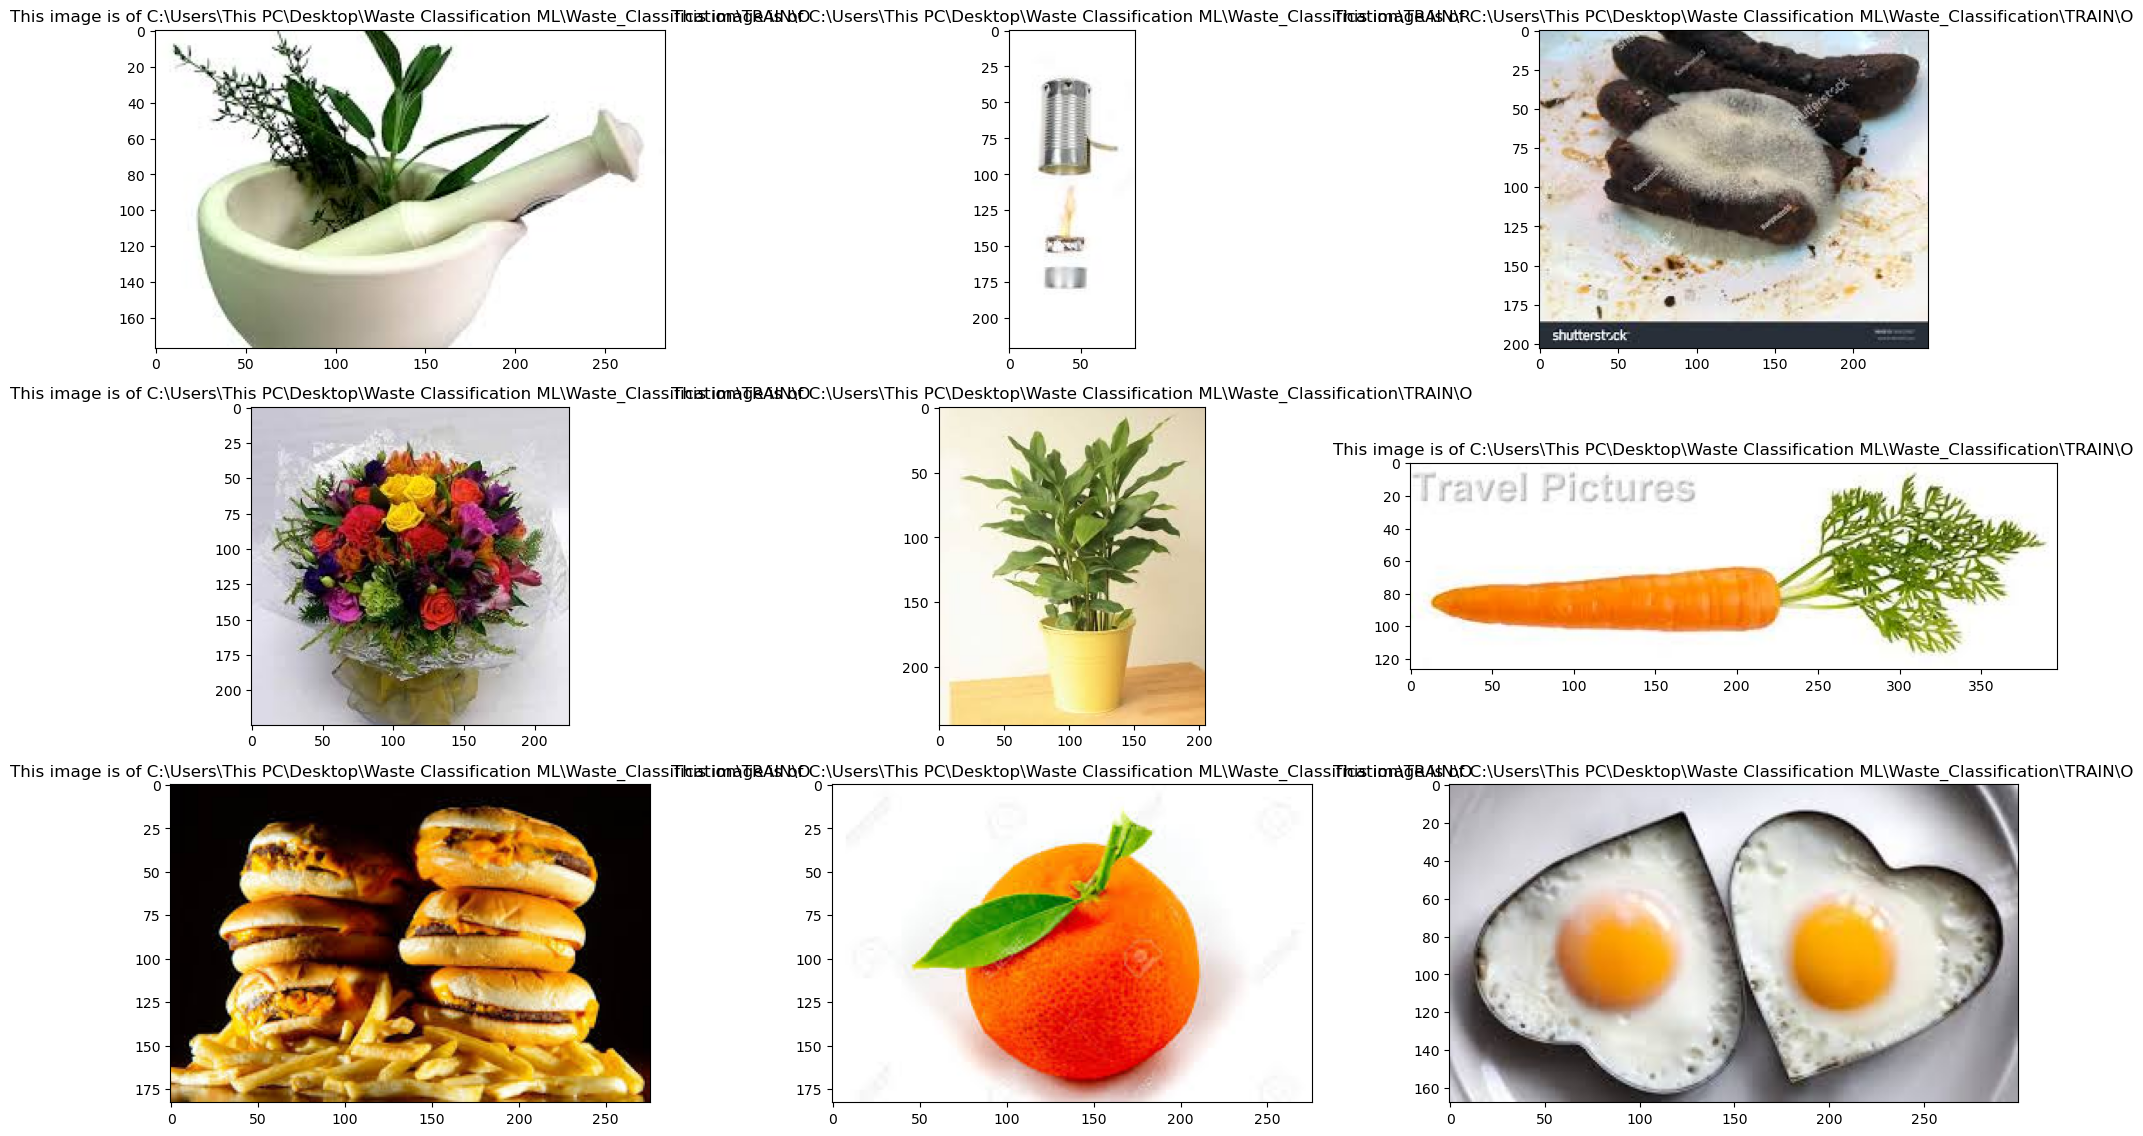

In [37]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [37]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [41]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
##model.add(Dense(numberOfClass)) 
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,120 (84.92 MB)

 Trainable params: 22,261,120 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [47]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_categories,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = train_datagen.flow_from_directory(
    test_categories,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

In [41]:
plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [52]:
pip install graphviz pydot


   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 1.2 MB/s eta 0:00:00


In [45]:
plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [47]:
!pip install graphviz pydot

In [1]:
import graphviz
print(graphviz.__version__)

0.20.3


In [5]:
plot_model(model)

NameError: name 'model' is not defined